# Notebook with Kaggle data import, scraped IMDb data import, merging of these two dataframes, and answering business questions with visualizations. 

<br>

<br>

## Part 1. Importing the Kaggle dataset with streaming platform and Rotten Tomatoes data into the notebook and building a dataframe. 

Dataset of movies on various streaming platforms, like Netflix, Hulu, Prime Video, Disney+ and their Rotten Tomatoe scores. Downloaded from https://www.kaggle.com/datasets/sanyacodes/movies-dataset-netflix-prime-video-disney. 

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Building a dataframe from the Kaggle dataset

In [2]:
# Read in the csv file from Kaggle
movies_kaggle = pd.read_csv('MoviesOnStreamingPlatforms.csv', sep=',', encoding='utf-8')

In [3]:
# View the dataframe
#display(movies_kaggle.head())

In [4]:
# Drop unnecessary columns 
movies_kaggle = movies_kaggle.drop(columns=['Unnamed: 0','Type','Age'])

In [5]:
# Rename columns to snake case
movies_kaggle.rename(columns = {'ID':'id', 'Title':'title', 'Year':'year', 'Rotten Tomatoes':'rotten_tomatoes', 'Netflix':'netflix', 'Hulu':'hulu',
                               'Prime Video':'prime_video', 'Disney+':'disney_plus'}, inplace=True)

In [6]:
# Check the data types
print(movies_kaggle.dtypes)

id                  int64
title              object
year                int64
rotten_tomatoes    object
netflix             int64
hulu                int64
prime_video         int64
disney_plus         int64
dtype: object


In [7]:
# Convert the year column to datetime data type
movies_kaggle['year'] = pd.to_datetime(movies_kaggle['year'], errors='coerce', format='%Y')
print(movies_kaggle.dtypes)

id                          int64
title                      object
year               datetime64[ns]
rotten_tomatoes            object
netflix                     int64
hulu                        int64
prime_video                 int64
disney_plus                 int64
dtype: object


<br>

<br>

## Part 2. Import data from IMDb scrape

In [8]:
# Read in a copy of the scraped csv file from IMDb
movies_imdb = pd.read_csv('imdb_53_raw_scrape.csv', sep=',', encoding='utf-8')

In [9]:
display(movies_imdb.head())

,title,year,imdb_ratings
0,1. Oh My Darling,2021,5.8
1,2. Blueberry,2021,6.0
2,3. H.P. Lovecraft's Witch House,2021,2.6
3,4. Malibu Road,2021,4.5
4,5. Apache Leap,2021,NaN


In [10]:
# Remove the number before the movie title in the dataframe 
movies_imdb['title'] = movies_imdb['title'].str.replace(r'^\d+\.\s*', '', regex=True)

# View to see if it worked 
display(movies_imdb.head())

,title,year,imdb_ratings
0,Oh My Darling,2021,5.8
1,Blueberry,2021,6.0
2,H.P. Lovecraft's Witch House,2021,2.6
3,Malibu Road,2021,4.5
4,Apache Leap,2021,NaN


<br>

<br>

## Part 3. Merge the data

In [11]:
# Make sure the column names are the same
print(movies_imdb.columns)
print(movies_kaggle.columns)

Index(['title', 'year', 'imdb_ratings'], dtype='object')
Index(['id', 'title', 'year', 'rotten_tomatoes', 'netflix', 'hulu',
       'prime_video', 'disney_plus'],
      dtype='object')


In [12]:
# Make sure the datatypes are the same
print(movies_kaggle.loc[:,['title','year']].dtypes)
print(movies_imdb.loc[:,['title','year']].dtypes)

title            object
year     datetime64[ns]
dtype: object
title    object
year     object
dtype: object


In [13]:
# Convert IMDb year to int
movies_imdb['year'] = pd.to_datetime(movies_imdb['year'], errors='coerce', format='%Y')

# Check again
print(movies_kaggle.loc[:,['title','year']].dtypes)
print(movies_imdb.loc[:,['title','year']].dtypes)

title            object
year     datetime64[ns]
dtype: object
title            object
year     datetime64[ns]
dtype: object


In [14]:
# Merge the two dataframes
merged_movies = pd.merge(movies_imdb, movies_kaggle, on=['title', 'year'], how='inner')

# View to see how much is overlapping 
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes,netflix,hulu,prime_video,disney_plus
0,The Lift,2021-01-01,NaN,6699,48/100,0,0,1,0
1,Resort to Love,2021-01-01,5.7,2828,44/100,1,0,0,0
2,Hostage House,2021-01-01,3.9,2740,45/100,1,0,0,0
3,Blood Red Sky,2021-01-01,6.1,735,66/100,1,0,0,0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...
478,Mister America,2019-01-01,6.4,4446,53/100,0,1,0,0
479,The Addams Family,2019-01-01,5.8,3952,68/100,0,1,0,0
480,Earthquake Bird,2019-01-01,6.0,1128,61/100,1,0,0,0
481,Trick,2019-01-01,4.9,4421,53/100,0,1,0,0


<br>

<br>

## Part 4. Business questions with visualizations. 

<br>

# Question 1: Which streaming platform has the most "popular" movies based on a certain threshold? (Top 25% of IMDb ratings and Rotten Tomatoes score of >= 60%). 

In [15]:
# Turn rotten_tomatoes into a single number based on the score out of 100
merged_movies['rotten_tomatoes_percentage'] = (
    merged_movies['rotten_tomatoes']
    .str.split('/')             
    .apply(lambda x: int(x[0]) / int(x[1]) * 100))
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes,netflix,hulu,prime_video,disney_plus,rotten_tomatoes_percentage
0,The Lift,2021-01-01,NaN,6699,48/100,0,0,1,0,48.0
1,Resort to Love,2021-01-01,5.7,2828,44/100,1,0,0,0,44.0
2,Hostage House,2021-01-01,3.9,2740,45/100,1,0,0,0,45.0
3,Blood Red Sky,2021-01-01,6.1,735,66/100,1,0,0,0,66.0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69/100,1,0,0,0,69.0
...,...,...,...,...,...,...,...,...,...,...
478,Mister America,2019-01-01,6.4,4446,53/100,0,1,0,0,53.0
479,The Addams Family,2019-01-01,5.8,3952,68/100,0,1,0,0,68.0
480,Earthquake Bird,2019-01-01,6.0,1128,61/100,1,0,0,0,61.0
481,Trick,2019-01-01,4.9,4421,53/100,0,1,0,0,53.0


In [16]:
# Drop original rotten_tomatoes column
merged_movies.drop(columns=['rotten_tomatoes'])

# Reorder the columns to fit original dataset
new_order = ['title', 'year', 'imdb_ratings', 'id', 'rotten_tomatoes_percentage', 'netflix', 'hulu', 
'prime_video', 'disney_plus']
merged_movies = merged_movies[new_order]
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes_percentage,netflix,hulu,prime_video,disney_plus
0,The Lift,2021-01-01,NaN,6699,48.0,0,0,1,0
1,Resort to Love,2021-01-01,5.7,2828,44.0,1,0,0,0
2,Hostage House,2021-01-01,3.9,2740,45.0,1,0,0,0
3,Blood Red Sky,2021-01-01,6.1,735,66.0,1,0,0,0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
478,Mister America,2019-01-01,6.4,4446,53.0,0,1,0,0
479,The Addams Family,2019-01-01,5.8,3952,68.0,0,1,0,0
480,Earthquake Bird,2019-01-01,6.0,1128,61.0,1,0,0,0
481,Trick,2019-01-01,4.9,4421,53.0,0,1,0,0


In [17]:
# Fill NaN with 0 to be able to calculate averages
merged_movies['imdb_ratings'] = merged_movies['imdb_ratings'].fillna(0)

In [18]:
# Calculate the cutoff for the top 25% of IMDb scores
top_25_percent = merged_movies['imdb_ratings'].quantile(0.75)
#print(top_25_percent)

In [19]:
# Return all movies on each streaming service that meet the criteria of Rotten Tomatoes score greater than or equal to 60% and IMDb is in the top 25%

# Netflix
popular_netflix = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['netflix'] == 1)]

# Hulu
popular_hulu = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['hulu'] == 1)]

# Prime Video
popular_prime = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['prime_video'] == 1)]

# Disney+
popular_disney = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['disney_plus'] == 1)]

# Print the number of movies meeting the popularity criteria for each service
print(f"Popular movies on Netflix: {len(popular_netflix)}")
print(f"Popular movies on Hulu: {len(popular_hulu)}")
print(f"Popular movies on Prime Video: {len(popular_prime)}")
print(f"Popular movies on Disney+: {len(popular_disney)}")

Popular movies on Netflix: 38
Popular movies on Hulu: 12
Popular movies on Prime Video: 11
Popular movies on Disney+: 11


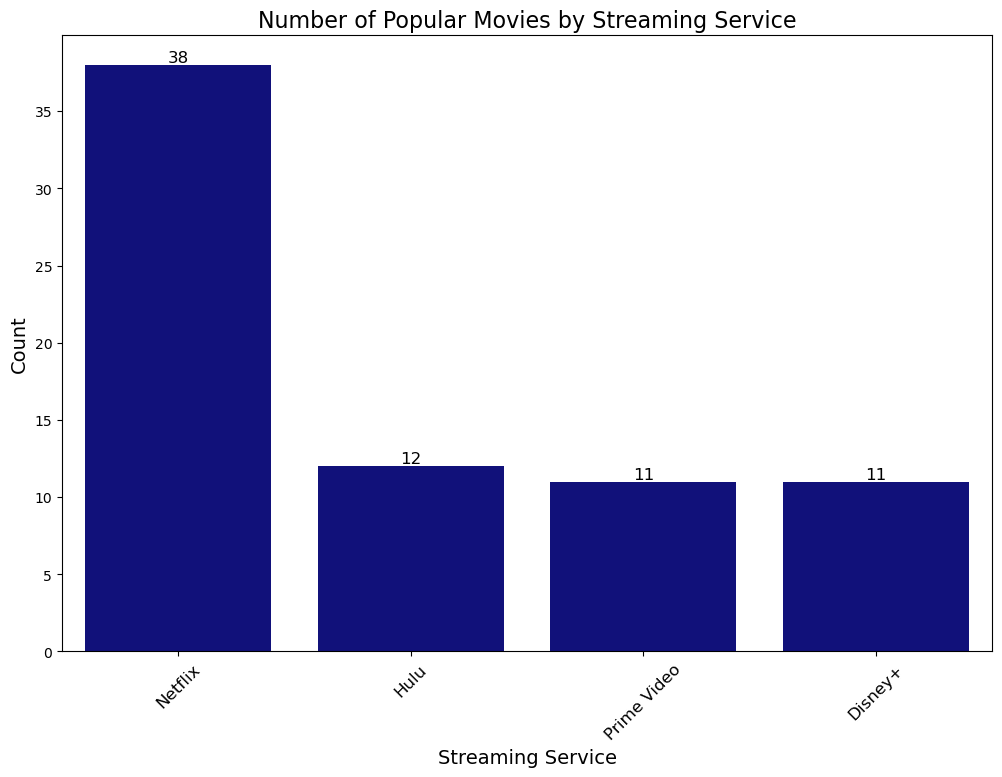

In [20]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Count': [
        len(popular_netflix),
        len(popular_hulu),
        len(popular_prime),
        len(popular_disney)
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Count', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Count', data=data, order=data['Service'], color="darkblue")

# Add title and labels
plt.title("Number of Popular Movies by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

<br>

# Question 2. How does each streaming platform's average IMDb rating and Rotten Tomatoes score compared to the overall average of all movies released between 2019-2021?

### Average IMDb

In [21]:
# Overall mean
imdb_mean = merged_movies['imdb_ratings'].mean()
print(f"Overall IMDb Mean: {round(imdb_mean, 2)}\n")

# Netflix mean
netflix_movies = merged_movies[merged_movies['netflix'] == 1]
netflix_imdb_mean = netflix_movies['imdb_ratings'].mean()
print(f"Netflix IMDb Mean: {round(netflix_imdb_mean, 2)}")

# Hulu mean
hulu_movies = merged_movies[merged_movies['hulu'] == 1]
hulu_imdb_mean = hulu_movies['imdb_ratings'].mean()
print(f"Hulu IMDb Mean: {round(hulu_imdb_mean, 2)}")

# Prime Video mean
prime_movies = merged_movies[merged_movies['prime_video'] == 1]
prime_imdb_mean = prime_movies['imdb_ratings'].mean()
print(f"Prime Video IMDb Mean: {round(prime_imdb_mean, 2)}")

# Disney+ mean
disney_movies = merged_movies[merged_movies['disney_plus'] == 1]
disney_imdb_mean = disney_movies['imdb_ratings'].mean()
print(f"Disney+ IMDb Mean: {round(disney_imdb_mean, 2)}")

Overall IMDb Mean: 5.64

Netflix IMDb Mean: 5.83
Hulu IMDb Mean: 5.61
Prime Video IMDb Mean: 5.16
Disney+ IMDb Mean: 6.72


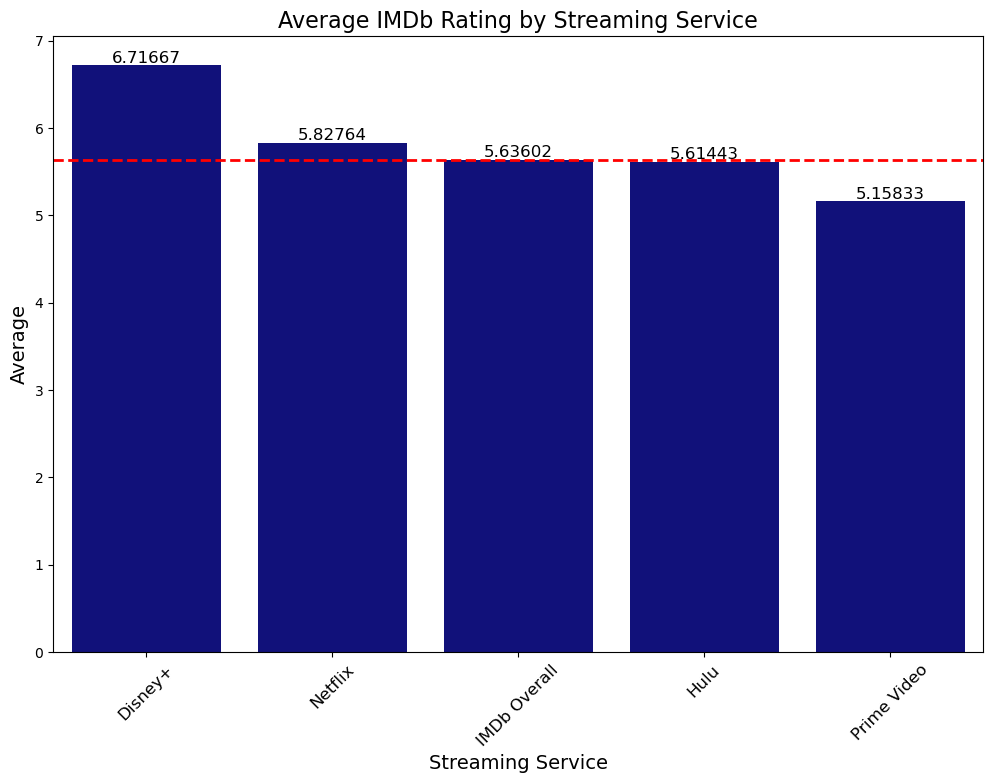

In [22]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['IMDb Overall', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Average': [
        imdb_mean,
        netflix_imdb_mean,
        hulu_imdb_mean,
        prime_imdb_mean,
        disney_imdb_mean
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Average', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Average', data=data, order=data['Service'], color="darkblue")

# Add the horizontal line for 'IMDb Overall' average
overall_average = imdb_mean  # Assuming imdb_mean is defined
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=2, label='Overall Average')

# Add title and labels
plt.title("Average IMDb Rating by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Average", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

### Average Rotten Tomatoes

In [23]:
# Overall mean
rotten_tomatoes_mean = merged_movies['rotten_tomatoes_percentage'].mean()
print(f"Overall Rotten Tomatoes Mean: {round(rotten_tomatoes_mean, 2)}\n")

# Netflix mean
netflix_movies_rt = merged_movies[merged_movies['netflix'] == 1]
netflix_rt_mean = netflix_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Netflix Rotten Tomatoes Mean: {round(netflix_rt_mean, 2)}")

# Hulu mean
hulu_movies_rt = merged_movies[merged_movies['hulu'] == 1]
hulu_rt_mean = hulu_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Hulu Rotten Tomatoes Mean: {round(hulu_rt_mean, 2)}")

# Prime Video mean
prime_movies_rt = merged_movies[merged_movies['prime_video'] == 1]
prime_rt_mean = prime_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Prime Video Rotten Tomatoes Mean: {round(prime_rt_mean, 2)}")

# Disney+ mean
disney_movies_rt = merged_movies[merged_movies['disney_plus'] == 1]
disney_rt_mean = disney_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Disney+ Rotten Tomatoes Mean: {round(disney_rt_mean, 2)}")

Overall Rotten Tomatoes Mean: 56.17

Netflix Rotten Tomatoes Mean: 60.12
Hulu Rotten Tomatoes Mean: 57.85
Prime Video Rotten Tomatoes Mean: 49.06
Disney+ Rotten Tomatoes Mean: 60.36


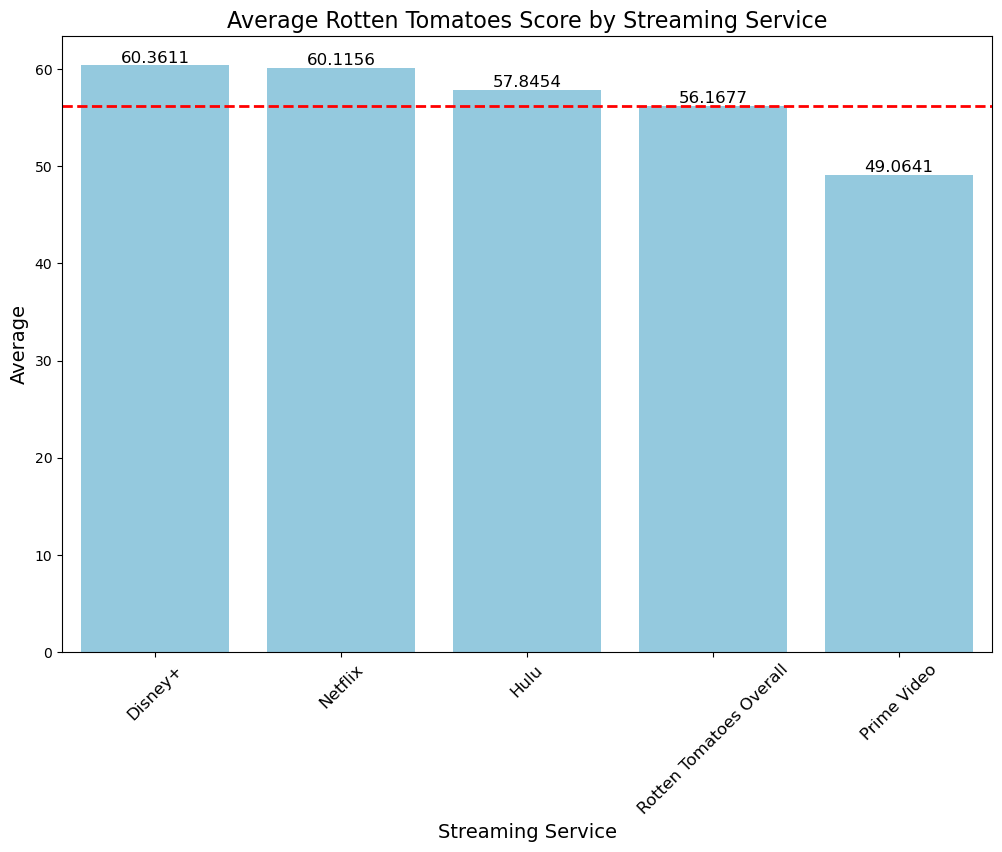

In [24]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['Rotten Tomatoes Overall', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Average': [
        rotten_tomatoes_mean,
        netflix_rt_mean,
        hulu_rt_mean,
        prime_rt_mean,
        disney_rt_mean
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Average', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Average', data=data, order=data['Service'], color="skyblue")

# Add the horizontal line for 'Rotten Tomatoes Overall' average
overall_average = rotten_tomatoes_mean  
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=2, label='Overall Average')

# Add title and labels
plt.title("Average Rotten Tomatoes Score by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Average", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()

<br>

# Question 3. How many movies are available on multiple platforms? Which platforms overlap the most in movie offerings? 

In [25]:
movies_kaggle['platform_count'] = movies_kaggle[['netflix','hulu', 'prime_video', 'disney_plus']].sum(axis=1)

display(movies_kaggle)

,id,title,year,rotten_tomatoes,netflix,hulu,prime_video,disney_plus,platform_count
0,1,The Irishman,2019-01-01,98/100,1,0,0,0,1
1,2,Dangal,2016-01-01,97/100,1,0,0,0,1
2,3,David Attenborough: A Life on Our Planet,2020-01-01,95/100,1,0,0,0,1
3,4,Lagaan: Once Upon a Time in India,2001-01-01,94/100,1,0,0,0,1
4,5,Roma,2018-01-01,94/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020-01-01,14/100,0,0,0,1,1
9511,9512,Doc McStuffins: The Doc Is In,2020-01-01,13/100,0,0,0,1,1
9512,9513,Ultimate Viking Sword,2019-01-01,13/100,0,0,0,1,1
9513,9514,Hunt for the Abominable Snowman,2011-01-01,10/100,0,0,0,1,1


In [26]:
# Finding movies where platform count is greater than 1 
multi_platforms = movies_kaggle[movies_kaggle['platform_count']>1]

# Count the number of movies that are available on multiple platforms
multi_platforms_count = len(multi_platforms)
print(f"There are {multi_platforms_count} movies that are available on multiple streaming platforms.")

There are 253 movies that are available on multiple streaming platforms.


### Finding the overlaps to see which streaming platforms share the highest number of movies

In [27]:
# Counting the number of overlaps for each combination of streaming platforms 
netflix_hulu = ((movies_kaggle['netflix']==1) & (movies_kaggle['hulu']==1)).sum()
print(netflix_hulu)
netflix_prime = ((movies_kaggle['netflix']==1) & (movies_kaggle['prime_video']==1)).sum()
print(netflix_prime)
netflix_disney = ((movies_kaggle['netflix']==1) & (movies_kaggle['disney_plus']==1)).sum()
print(netflix_disney)
hulu_prime = ((movies_kaggle['hulu']==1) & (movies_kaggle['prime_video']==1)).sum()
hulu_disney = ((movies_kaggle['hulu']==1) & (movies_kaggle['disney_plus']==1)).sum()
prime_disney = ((movies_kaggle['prime_video']==1) & (movies_kaggle['disney_plus']==1)).sum()

39
109
6


In [28]:
# Find the maximum overlap count
max_overlap = max(netflix_hulu, netflix_prime, netflix_disney, hulu_prime, hulu_disney, prime_disney)

# Find which pair has the maximum overlap
if max_overlap == netflix_hulu:
    max_pair = 'netflix_hulu'
elif max_overlap == netflix_prime:
    max_pair = 'netflix_prime'
elif max_overlap == netflix_disney:
    max_pair = 'netflix_disney'
elif max_overlap == hulu_prime:
    max_pair = 'hulu_prime'
elif max_overlap == hulu_disney:
    max_pair = 'hulu_disney'
else:
    max_pair = 'prime_disney'

In [29]:
# The result 
print(f"The platform pair with the most overlap (highest number of movies available on both platforms) is {max_pair.replace('_', ' and ')} with {max_overlap} movies overlapping.") 

The platform pair with the most overlap (highest number of movies available on both platforms) is netflix and prime with 109 movies overlapping.


In [30]:
# Create a visualization
movies_kaggle['netflix'].sum()

# Move this overlapping data into a dictionary and dataframe
overlap_data ={
    'Netflix': [movies_kaggle['netflix'].sum(), netflix_hulu, netflix_prime, netflix_disney],
    'Hulu': [netflix_hulu, movies_kaggle['hulu'].sum(), hulu_prime, hulu_disney],
    'Prime Video': [netflix_prime, hulu_prime, movies_kaggle['prime_video'].sum(),prime_disney],
    'Disney+': [netflix_disney, hulu_disney, prime_disney, movies_kaggle['disney_plus'].sum()]
}
overlap_matrix = pd.DataFrame(overlap_data, index=['Netflix', 'Hulu', 'Prime Video', 'Disney+'])

display(overlap_matrix)

,Netflix,Hulu,Prime Video,Disney+
Netflix,3695,39,109,6
Hulu,39,1047,99,6
Prime Video,109,99,4113,13
Disney+,6,6,13,922


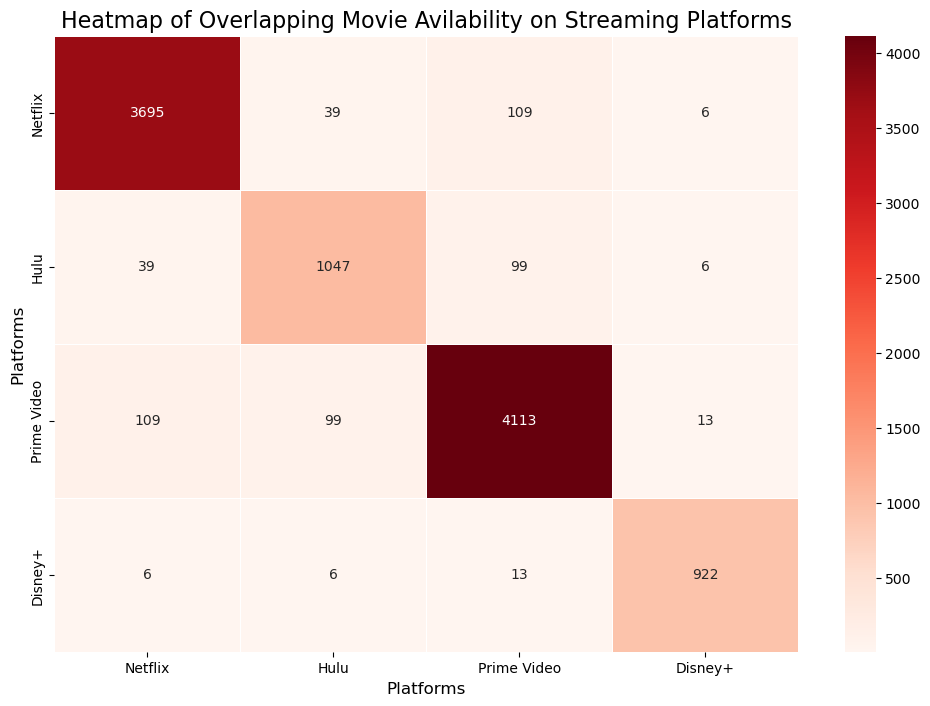

In [31]:
# Create a heatmap for overlapping movies on platforms
plt.figure(figsize=(12, 8))
sns.heatmap(overlap_matrix, annot=True, fmt='d', cmap='Reds', linewidths=.5) 

# Add labels and title
plt.title("Heatmap of Overlapping Movie Avilability on Streaming Platforms", fontsize=16)
plt.xlabel("Platforms", fontsize=12)
plt.ylabel("Platforms", fontsize=12)
plt.show()

<br>

# Question 4. How many movies were added to each platform in each release year (2019-2021)? 

In [32]:
# Extract year
merged_movies['year'] = pd.to_datetime(merged_movies['year'], errors='coerce').dt.year
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes_percentage,netflix,hulu,prime_video,disney_plus
0,The Lift,2021,0.0,6699,48.0,0,0,1,0
1,Resort to Love,2021,5.7,2828,44.0,1,0,0,0
2,Hostage House,2021,3.9,2740,45.0,1,0,0,0
3,Blood Red Sky,2021,6.1,735,66.0,1,0,0,0
4,Trollhunters: Rise of the Titans,2021,6.6,581,69.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
478,Mister America,2019,6.4,4446,53.0,0,1,0,0
479,The Addams Family,2019,5.8,3952,68.0,0,1,0,0
480,Earthquake Bird,2019,6.0,1128,61.0,1,0,0,0
481,Trick,2019,4.9,4421,53.0,0,1,0,0


In [33]:
# Identify platform columns
platform_columns = ['netflix', 'hulu', 'disney_plus', 'prime_video'] 

# Create a dataframe
platform_years = pd.DataFrame()

In [34]:
# Group by year for each platform
for platform in platform_columns: 
    count = merged_movies[merged_movies[platform] == 1].groupby('year').size()
    platform_years[platform] = count

# Fill missing years with 0
platform_years = platform_years.fillna(0).astype(int)

display(platform_years)

,netflix,hulu,disney_plus,prime_video
year,,,,
2019,25,13,4,17
2020,130,67,24,102
2021,44,17,8,37


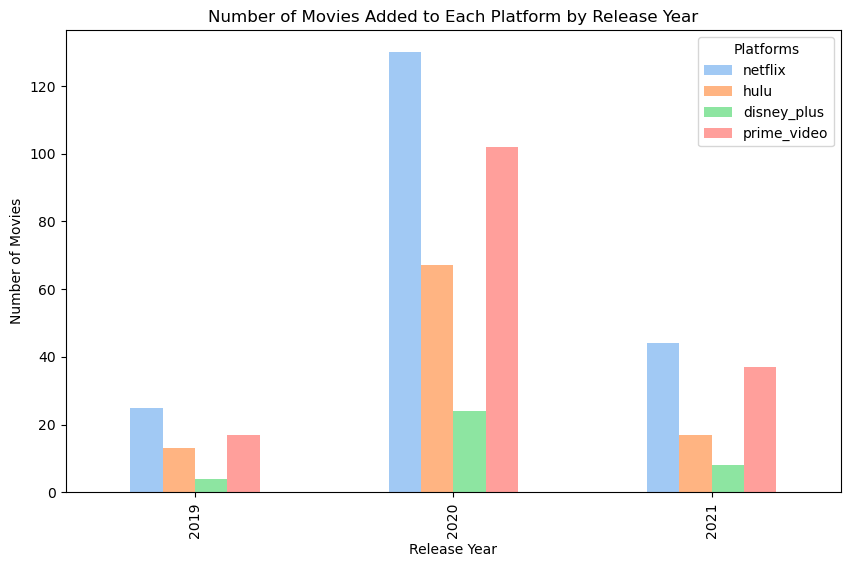

In [35]:
# Bar chart 
# Plotting the counts
platform_years.plot(kind='bar', figsize=(10, 6), color=sns.color_palette("pastel"))
plt.title("Number of Movies Added to Each Platform by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Platforms")
plt.show()